# ahppy
The goal of the package is to provide a tool to interactively model, build and calculate AHP models.

In [1]:
from IPython.display import Image

# Problem definition

**example problem** https://en.wikipedia.org/wiki/Analytic_hierarchy_process_%E2%80%93_car_example

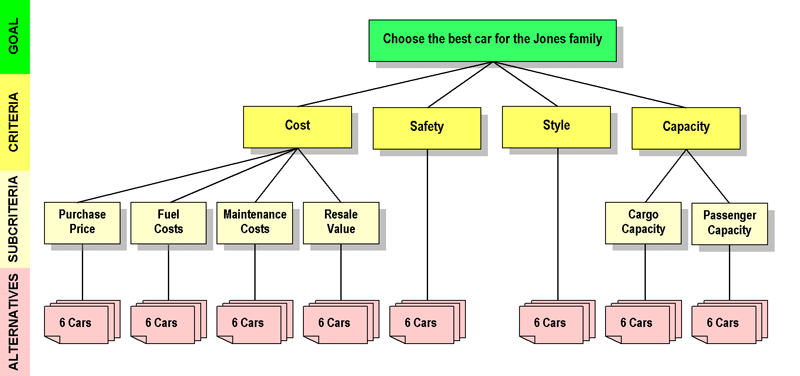

In [2]:
Image("https://upload.wikimedia.org/wikipedia/commons/6/67/AHPJones01.png")

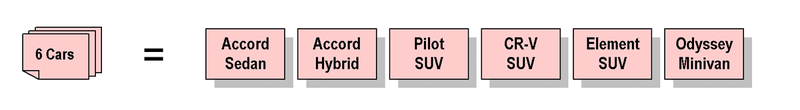

In [3]:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/AHPHierarchyAlternativesOnly.png/800px-AHPHierarchyAlternativesOnly.png")

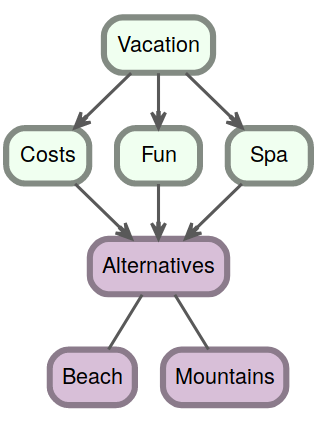

an input to model this problem would look like

```python
model = AHP(
    df=None, # a DataFrame can be passed directly, columns other parameters will be ignored
    columns=[
        "cost",
        "cost.purchase_price",
        "cost.fuel_costs",
        "cost.maintenance_costs",
        "cost.resale_value",
        "safety",
        "style",
        "capacity",
        "capacity.cargo_capacity",
        "capacity.passenger_capacity"
    ],
    index=["alternative1",
           "alternative2",
          ...],
    funcs={"cost.purchase_price": lambda x: x } # eg. normalize in range 1 -9
)
```

With this structure, a 2d representation of the model means that criteria are columns, alternatives are rows. Subcriteria are inferred from having a top-level criterion in the column name followed by a "." or some other customizable character.

## Features
* styled display of result matrix ala https://github.com/renkun-ken/formattable
* multiple decision makers
* Use a function to create judgement for criteria (ratios, normalize in range 1-9, etc ...)

In [4]:
from anytree import Node, RenderTree
udo = Node("Udo")
marc = Node("Marc", parent=udo)
lian = Node("Lian", parent=marc)
dan = Node("Dan", parent=udo)
jet = Node("Jet", parent=dan)
jan = Node("Jan", parent=dan)
joe = Node("Joe", parent=dan)

In [62]:
from anytree.exporter import DotExporter
import anytree

In [6]:
DotExporter(udo).to_picture("udo.png")

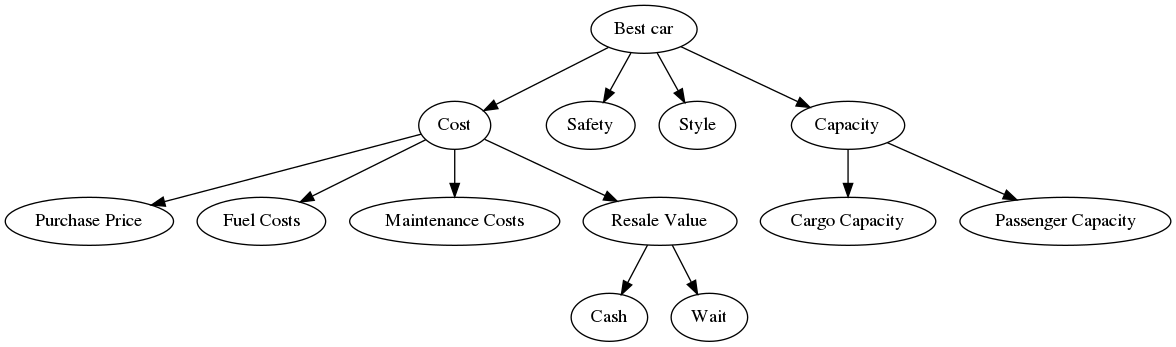

In [32]:
goal = Node("Best car")

cost = Node("Cost", parent=goal)
safety = Node("Safety", parent=goal)
style = Node("Style", parent=goal)
capacity = Node("Capacity", parent=goal)

purchase_price = Node("Purchase Price", parent=cost)
fuel_costs = Node("Fuel Costs", parent=cost)
maintenance_costs = Node("Maintenance Costs", parent=cost)
resale_value = Node("Resale Value", parent=cost)

cash = Node("Cash", parent=resale_value)
wait = Node("Wait", parent=resale_value)

cargo_capacity = Node("Cargo Capacity", parent=capacity)
passenger_capacity = Node("Passenger Capacity", parent=capacity)

DotExporter(goal).to_picture("jones.png")
Image("./jones.png")

### Model creation

In [66]:
columns = [
    "cost",
    "cost.purchase_price",
    "cost.fuel_costs",
    "cost.maintenance_costs",
    "cost.resale_value",
    "cost.resale_value.cash",
    "cost.resale_value.wait",
    "safety",
    "style",
    "capacity",
    "capacity.cargo_capacity",
    "capacity.passenger_capacity"
]

In [67]:
goal = Node("goals")
for col in columns:
    levels = [Node(l) for l in col.split(".")]
    for i, l in enumerate(levels):
        children_names = lambda n: [c.name for c in n.children]
        # The first element is a root node
        if i > 0:
            parent = anytree.search.find_by_attr(node=goal, value=levels[i - 1].name)
            print(i, l, parent)
        else:
            parent = goal
        if l.name not in children_names(parent):
            l.parent = parent

1 Node('/purchase_price') Node('/goals/cost')
1 Node('/fuel_costs') Node('/goals/cost')
1 Node('/maintenance_costs') Node('/goals/cost')
1 Node('/resale_value') Node('/goals/cost')
1 Node('/resale_value') Node('/goals/cost')
2 Node('/cash') Node('/goals/cost/resale_value')
1 Node('/resale_value') Node('/goals/cost')
2 Node('/wait') Node('/goals/cost/resale_value')
1 Node('/cargo_capacity') Node('/goals/capacity')
1 Node('/passenger_capacity') Node('/goals/capacity')


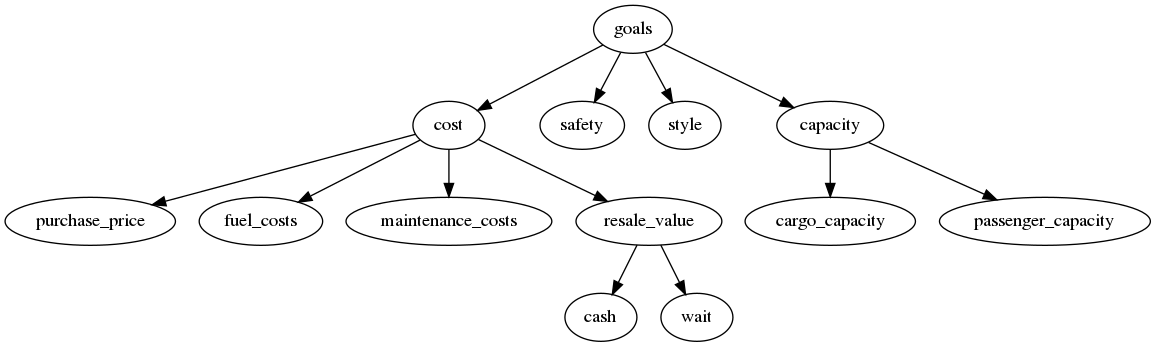

In [68]:
exp = DotExporter(goal)
exp.to_picture("goal.png")
Image("./goal.png")